# Prediction of Apple Stock Price using Stacked LSTM

# 1. Loading the Dataset

In [4]:
# https://github.com/krishnaik06/Stock-MArket-Forecasting/blob/master/Untitled.ipynb

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [8]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [9]:
df1=df.reset_index()['close'] # reset index means the 1253 coloum will be going into it and we will be taking the close price
# of the APPLE stock ( we can use other coloumn as well)

In [10]:
df1 # to see the records

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

# 2. Data Visualization

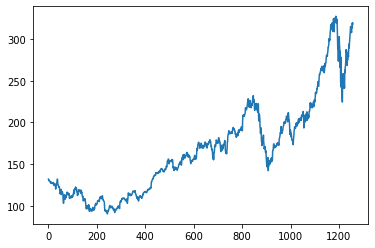

In [11]:
import matplotlib.pyplot as plt # plot the close price of the stock (y axis) vs the date (x axis)
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
# MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range.
# The range is the difference between the original maximum and original minimum.
# if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, 
# and it makes the underlying assumption that higher ranging numbers have superiority of some sort. 
# So these more significant number starts playing a more decisive role while training the model.

# 3. Data Split and Normalisation

In [13]:
import numpy as np

In [14]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # lstm is data range sensitive
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # so to provide the input to fit into the fit_transform

In [16]:
print(df1) # our data coloumn has been scaled to fit into (0,1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65) # 65% of the total length is the training data
test_size=len(df1)-training_size # the rest is testing data
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1] #

In [18]:
training_size,test_size # total size is 1258 

(817, 441)

In [19]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [20]:
# preprocessing the data
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1): # we have this method create_dataset where 
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # we need to re shape of x train into 3 dimension to load it into LSTM
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1) #

# 4. Create the Stacked LSTM model

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential() # we are using a sequential model
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # 1st layer,  inputs are x train shape which is 100 and 1 
model.add(LSTM(50,return_sequences=True)) # 2nd layer, 
model.add(LSTM(50)) # 3rd layer, 
model.add(Dense(1)) # 1 final output
model.compile(loss='mean_squared_error',optimizer='adam') # compiling with the help of mean_sq_error and adam optimiser

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


#  5. Training the Model

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1) # fitting our x train, y train, validation data and epochs is 100

Epoch 1/100
12/12 [==============================] - 8s 288ms/step - loss: 0.0170 - val_loss: 0.0614
Epoch 2/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 2s 172ms/step - loss: 9.3584e-04 - val_loss: 0.0066
Epoch 4/100
12/12 [==============================] - 2s 169ms/step - loss: 7.7662e-04 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 2s 165ms/step - loss: 7.4661e-04 - val_loss: 0.0044
Epoch 6/100
12/12 [==============================] - 2s 164ms/step - loss: 6.7328e-04 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 2s 166ms/step - loss: 7.0417e-04 - val_loss: 0.0037
Epoch 8/100
12/12 [==============================] - 2s 167ms/step - loss: 6.1811e-04 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 2s 167ms/step - loss: 6.0138e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 2s 166ms/

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.6.0'

# 6. Prediction of x train data and check performance metrics

In [32]:
### prediction of x train data and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
## Since the data was scaled we need to reverse it so we can find RMS performance matrix
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

139.8388184386915

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.89795336074596

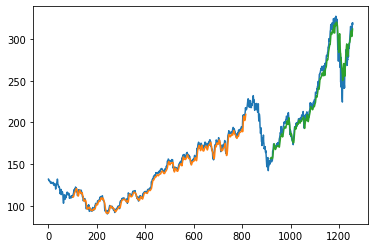

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100 #time step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
# Forecasting 30 days of stock price #independent find errors

In [38]:
len(test_data) # if our last date is 25th may and in order to predict 26th mays price we need 100 days data before 26th to predict it

441

In [39]:
x_input=test_data[341:].reshape(1,-1) # hence we are taking 100 datas before that (441-100=341)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input) # convert it into a list
temp_input=temp_input[0].tolist()

In [41]:
temp_input # all the 100 test_data and length is 100

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [42]:
# Logic for predicting the data : 
# else statement is executed 1st because temp input is not > than 100 
# the output is predicted
# it is added then added to temp_input
# then the IF statement runs and the process continues till we get 30 days of worth of data

In [43]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:]) # one position is shifted to the right 
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1)) # we reshape the data before we pass it to our lstm model
        yhat = model.predict(x_input, verbose=0) # 
        print(yhat[0]) # output 
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # yhat (which is our output) is added our lst_output [] also the len(temp_input) will increase by 1 as a new prediction is added
        i=i+1 # the else statement is then terminated and ONLY the IF statement will be running
    

print(lst_output)

[0.9435483]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [44]:
day_new=np.arange(1,101) # from tests data we have taken previous 100 days
day_pred=np.arange(101,131) # we are taking the next 30 days

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

1258

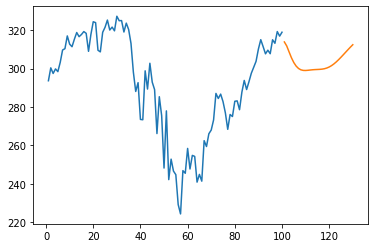

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:])) # 1258-100=1258
plt.plot(day_pred,scaler.inverse_transform(lst_output))

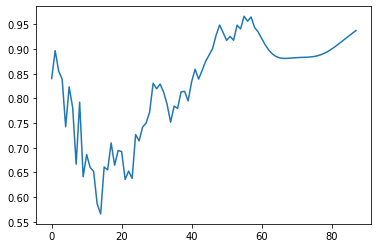

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

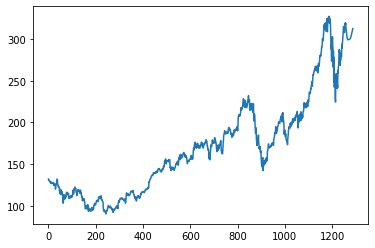

In [50]:
plt.plot(df3)

In [51]:
print(df3)

[[132.045], [131.78], [130.28], [130.535], [129.96], [130.12], [129.36], [128.65], [127.8], [127.42], [128.88], [128.59], [127.17000000000002], [126.92], [127.6], [127.3], [127.88], [126.6], [127.61], [127.03], [128.11], [127.5], [126.74999999999999], [124.53], [125.425], [126.6], [126.43999999999998], [126.0], [125.69000000000001], [122.57], [120.07], [123.28], [125.65999999999998], [125.61], [126.81999999999998], [128.51], [129.62], [132.07], [130.75], [125.22], [125.15999999999998], [124.50000000000001], [122.77], [123.37999999999998], [122.98999999999998], [122.37], [121.3], [118.43999999999998], [114.64], [115.4], [115.13], [115.52], [119.72], [113.49], [115.24], [115.15], [115.96], [117.16], [116.5], [115.01], [112.65], [105.76], [103.12], [103.74], [109.69], [112.92], [113.29], [112.76], [107.72], [112.34], [110.37], [109.27], [112.31], [110.15], [112.57], [114.21], [115.31], [116.28], [116.41], [113.92], [113.45], [115.21], [113.4], [114.32], [115.0], [114.71], [112.44], [109.0

In [52]:
print(lst_output) # scaled values of predicted prices

[[0.943548321723938], [0.9347811341285706], [0.9216934442520142], [0.908867597579956], [0.8982971906661987], [0.8904883861541748], [0.8853064775466919], [0.8823431730270386], [0.8810641169548035], [0.8808940649032593], [0.8813157677650452], [0.8819217085838318], [0.8824570178985596], [0.8828272819519043], [0.8830795288085938], [0.8833559155464172], [0.8838546872138977], [0.8847809433937073], [0.8863120675086975], [0.8885568976402283], [0.8915629386901855], [0.895308792591095], [0.8997167348861694], [0.9046564698219299], [0.909974217414856], [0.9155179262161255], [0.9211417436599731], [0.9267271757125854], [0.9321779608726501], [0.9374326467514038]]


In [53]:
print(scaler.inverse_transform(lst_output)) # the predicted prices for the 30 days

[[313.82885548]
 [311.75225943]
 [308.65230921]
 [305.61437916]
 [303.11067258]
 [301.26107914]
 [300.03369227]
 [299.33180396]
 [299.02884674]
 [298.98856821]
 [299.08845275]
 [299.2319759 ]
 [299.35876926]
 [299.44647   ]
 [299.50621719]
 [299.57168216]
 [299.68982121]
 [299.90921425]
 [300.27187631]
 [300.80358678]
 [301.51559766]
 [302.40284061]
 [303.44690583]
 [304.61693144]
 [305.87649314]
 [307.189576  ]
 [308.5216334 ]
 [309.84459884]
 [311.13567181]
 [312.38029671]]
